# Testen des neuronalen Netzes Kategorisch

Zu Beginn müssen wieder alle Bibliotheken eingebunden werden.

In [1]:
#import all necessary packages
import os
import csv
import numpy as np
import pandas as pd
#from numpy import genfromtxt
#from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras

#%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

import IPython
import kerastuner as kt



Für den Fall, dass die Datensätze nicht im selben Verzeichnis wie die Python-Datei liegt muss das Verzeichnis des Datensatzes angegeben werden. Dies kann durch folgenden Befehl durchgeführt werden:

In [2]:
#function to set the start working directory manually
#not necessary, if the .py file is executed in the directory of the .csv files
#os.chdir('D:\\OneDrive - bwedu\\Uni\\09 ABC 1\\Neuronale Netzwerke\\Python\\Wein')



Um die Ergebnisse des neuronalen Netzwerks darzustellen, empfiehlt es sich eine confusion Matrix zu verwenden. 
Um am Ende die Ergebnisse graphisch darsetellen (plotten) zu können, muss zuerst die Funktion zur Erstellung 
der Confusion Matrix definiert werden. Dies wird in folgendem Codeabschnitt gemacht 
(die exakte Bedeutung und Funktionsweise der Codezeilen geht an dieser Stelle über den Rahmen des Projekts hinaus).


In [3]:
#Definition of the confusion matrix function, coppied from the internet (details not important)
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
	 


Nun wird das Arbeitsverzeichnis geändert. 
Dabei wird das Arbeitsverzeichnis so geändert, dass auf die zuvor vorbereiteten Daten zugegriffen werden kann. 

Codeabsatz 1 speichert das aktuelle Arbeitsverzeichnis.

Codeabsatz 2 ändert das Arbeitsverzeichnis.

Codeabsatz 3 importiert die im vorherigen Skript vorbereiteten Daten.

Codeabsatz 4 convertiert die Daten in ein numpy-Array und skaliert die daten in den Bereich von 0-1.

Dabei ist zu beachten, dass die erste Spalte des Datensatzes nicht von Relevanz ist und daher nicht beachtet wird, da diese lediglich die Nummerierung der Daten beinhaltet.

Im letzten Codeabsatz wird nach dem Import der Daten wieder in das Ausgangsverzeichnis gewechselt. 

In [4]:
#save the current working directory
current_wd = os.getcwd()

#change the working directory to the 'prep_dataset' directroy, where the prepared data a saved as .csv files
os.chdir('prep_dataset')

#import the prepared data as panda dataframes
W_test_samples = pd.read_csv('wine_test_samples.csv')
W_test_labels = pd.read_csv('wine_test_labels_cont.csv')

#convert panda dataframe to a numpy array
#leave out the first column, because this are the rownumernumbers
W_test_samples = pd.DataFrame.to_numpy(W_test_samples)[:,1:13]
W_test_labels = pd.DataFrame.to_numpy(W_test_labels)[:,1]-3

#change the working directory back to the original working directory
os.chdir(current_wd)



Nun wird das mit Skript 2 erstellte optimierte neuronale Netz geladen.

In [5]:
#load the model, saved by training befor
model = keras.models.load_model("wine_quality_cat_full.h5")



Vorhersage mit dem Modell

In [6]:
#make predictions with the model for the test dataset
predictions = model.predict(x = W_test_samples, batch_size = 10, verbose = 1 )


70/70 [==============================] - 0s 571us/step


Runden der Werte, um diese in der confusion Matrix darzustellen

In [7]:
#save the lable of the output node with the highest activation, this is the category the neuronal network sorted in the sample
rounded_predictions = np.argmax(predictions, axis=-1)

Mit folgendem Codeabsatz wird die confusion Matrix erstellt.

Confusion matrix, without normalization
[[  0   0   0   0   2   0   0]
 [  0  11  10   1   1   0   0]
 [  0  42 136  42  12   4   0]
 [  0  15  98  96  69  20   1]
 [  0   0  11  21  54  22   2]
 [  0   1   2   3   9  11   1]
 [  0   0   0   0   0   0   0]]


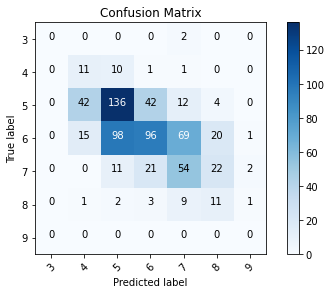

In [8]:
#create the confusion matrix
cm = confusion_matrix(y_true=W_test_labels, y_pred=rounded_predictions)
#define the labels for the categories
cm_plot_labels = ['3','4', '5', '6', '7', '8', '9']
#plot the confusion matrix, with the function defined above
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

Zu sehen ist, dass die Daten sehr ungleich verteilt waren. Da die ungleich verteilten Daten hier jedoch gewichtet werden können, kann der Effekt verringert werden. 

Im mittleren Qualitätsbereich (Güte 5-7) ist zu sehen, dass die Zuordnung erfolgreich ist, jedoch bei Weinen der schlechteren und besseren Güte versagt. 